In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pm_lib
from PIL import Image
from PySimpleAutomata import automata_IO
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM

In [35]:
selection_fa = ['NFA','DFA']

wid_selection_fa = widgets.Dropdown(name="FA")
wid_selection_fa.options = selection_fa

In [39]:
display(wid_selection_fa)

if wid_selection_fa.value == 'NFA':
    arquivo = 'nfa.jff'
    arquivoTeste = 'nfa.cases'
    doc = 'nfa.cases'

    print("NFA example: ")
    nfa = pm_lib.jffToNFA(arquivo)
    print("\n")
    param= pm_lib.nfa_validate(nfa, arquivoTeste)
    automata_IO.nfa_to_dot(nfa, 'teste_nfa', './')
    path = 'teste_nfa.dot.svg'
else:
    arquivo_dfa = 'dfa.jff'
    arquivo_teste_dfa = 'dfa.cases'
    doc = 'dfa.cases'

    print("\n")
    print("DFA example: ")
    dfa = pm_lib.jffToDFA(arquivo_dfa)
    print("\n")
    param= pm_lib.dfa_validate(dfa, arquivo_teste_dfa)
    automata_IO.dfa_to_dot(dfa, 'teste_dfa', './')
    path = 'teste_dfa.dot.svg'
expected_input = pd.read_csv(doc, sep='\t', engine='python')
expected_input.columns =['Word', 'Expected']

Dropdown(index=1, options=('NFA', 'DFA'), value='DFA')



DFA example: 




# Generated automata

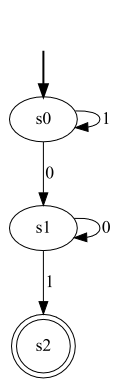

In [40]:
drawing = svg2rlg(path)
renderPM.drawToFile(drawing, 'output.png', fmt='PNG')
display(Image.open('output.png'))

### Tests cases

In [41]:
display(expected_input.head(len(expected_input)))

pm_lib.uncouple(param)

,Word,Expected
0,1,False
1,110,False
2,0,True
3,100,False


Tests failed:  2
for input 001 receive False but expected True
for input 000 receive True but expected False
